# Participants Data Overview

This holds the anaylsis of the onboarding data from the participants.

In [1]:
from all_imports import *

import _modules


 ### test init### 


In [28]:
filepath: str  = r'C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\data\raw\Onboarding\NUS IRB-2022-212 - Participant Onboarding Form_March 31, 2024_12.34.csv'

PARTICIPANTS_data_df = pd.read_csv(filepath, header=1)
PARTICIPANTS_data_df = PARTICIPANTS_data_df.drop(PARTICIPANTS_data_df.index[0])


columns_df = pd.DataFrame(PARTICIPANTS_data_df.columns, columns=['Column Names'])
columns_df.to_csv(r'C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\data\raw\Onboarding\Participant Onboarding column_names.csv', index=False)

#Select Participants
lst_participants = ['esse02', 'esse07', 'esse08', 'esse09', 'esse10', 'esse11', 'esse13','esse14'] 
PARTICIPANTS_data_df = PARTICIPANTS_data_df[PARTICIPANTS_data_df['Experiment tag (for example esse01, provided by the researcher)'].isin(lst_participants)]

PARTICIPANTS_data_df = PARTICIPANTS_data_df.rename(columns={'Experiment tag (for example esse01, provided by the researcher)': 'id_participant',
                                                            'Gender': 'gender',
                                                            'Height (cm)': 'height',
                                                            'Weight (kg)': 'weight',
                                                            'Year of birth (for example 1995)': 'YearofBirth'})

#Dtypes
PARTICIPANTS_data_df['height'] = PARTICIPANTS_data_df['height'].astype(float)
PARTICIPANTS_data_df['weight'] = PARTICIPANTS_data_df['weight'].astype(float)
PARTICIPANTS_data_df['YearofBirth'] = PARTICIPANTS_data_df['YearofBirth'].astype(int)

#calculate BMI
PARTICIPANTS_data_df['BMI'] = PARTICIPANTS_data_df['weight'] / (PARTICIPANTS_data_df['height'] / 100) ** 2
PARTICIPANTS_data_df['Age'] = 2024 - PARTICIPANTS_data_df['YearofBirth']

display(PARTICIPANTS_data_df.head(10))



,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,"On a scale from 0:00h to 23:00h, slide to indicate the aproximatly typical time you exercise on the following days. - Sunday",On which of those days do you train outdoors? - Monday,On which of those days do you train outdoors? - Tuesday,On which of those days do you train outdoors? - Wednesday,On which of those days do you train outdoors? - Thursday,On which of those days do you train outdoors? - Friday,On which of those days do you train outdoors? - Saturday,On which of those days do you train outdoors? - Sunday,BMI,Age
7,2/20/2024 10:00,2/20/2024 10:06,IP Address,122.11.212.167,100,392,True,2/20/2024 10:06,R_42c2guG252p75dW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.250887,25
8,2/20/2024 13:13,2/20/2024 13:22,IP Address,137.132.26.105,100,566,True,2/20/2024 13:22,R_4kRcOAaHXJMhVUe,NaN,...,0,Indoor,Indoor,Indoor,Indoor,Indoor,Outdoor,Outdoor,24.897060,24
9,2/20/2024 14:11,2/20/2024 14:21,IP Address,111.65.36.45,100,584,True,2/20/2024 14:21,R_4OIUoiYv01X7djS,NaN,...,1,Indoor,Indoor,Indoor,Indoor,Indoor,Outdoor,Indoor,22.230987,30
10,2/20/2024 15:09,2/20/2024 15:14,IP Address,137.132.26.170,100,301,True,2/20/2024 15:14,R_4T0w06ChvfJMVAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.422091,21
11,2/20/2024 16:02,2/20/2024 16:08,IP Address,104.28.122.110,100,380,True,2/20/2024 16:08,R_4rOrEWLn3LNWu5Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.735976,24
12,2/21/2024 10:17,2/21/2024 10:21,IP Address,202.51.247.23,100,238,True,2/21/2024 10:21,R_4Vr2bR1eZxYBcOq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.212293,23
14,2/21/2024 14:27,2/21/2024 14:40,IP Address,137.132.26.10,100,768,True,2/21/2024 14:40,R_4pR0qyPVsUL8niC,NaN,...,13,Indoor,Indoor,Indoor,Indoor,Indoor,Indoor,Indoor,20.829995,38
15,2/21/2024 15:30,2/21/2024 15:40,IP Address,137.132.26.120,100,628,True,2/21/2024 15:40,R_4qFaggmtHeKZJJt,NaN,...,0,Indoor,Indoor,Indoor,Indoor,Indoor,Indoor,Indoor,22.222222,22


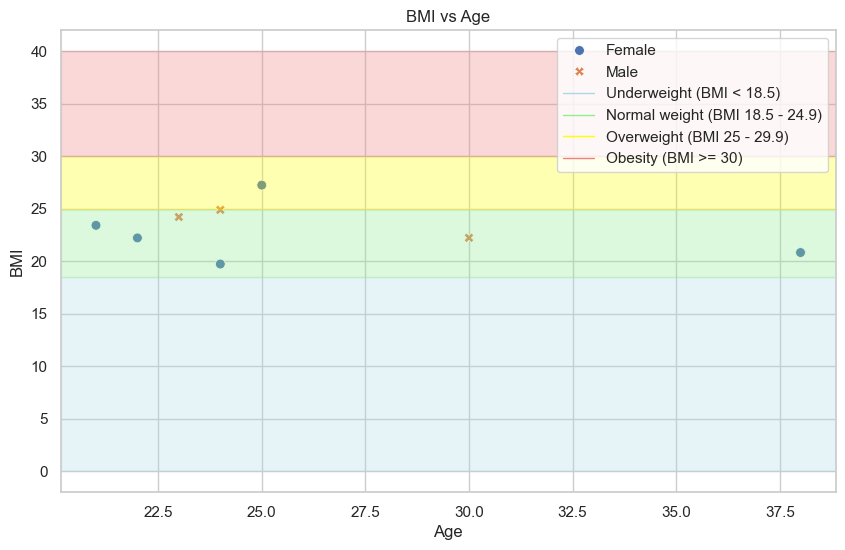

In [37]:
columns = ['id_participant', 'BMI', 'Age', 'gender', 'height', 'weight']
PARTICIPANTS_general_df = PARTICIPANTS_data_df[columns]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot: Scatter plot of BMI vs Age colored by Gender
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=PARTICIPANTS_general_df, x="Age", y="BMI", hue="gender", style="gender", s=50)

# Add background color for BMI categories
# Underweight: BMI < 18.5
ax.axhspan(0, 18.5, color='lightblue', alpha=0.3, label='Underweight (BMI < 18.5)')
# Normal weight: BMI 18.5 - 24.9
ax.axhspan(18.5, 24.9, color='lightgreen', alpha=0.3, label='Normal weight (BMI 18.5 - 24.9)')
# Overweight: BMI 25 - 29.9
ax.axhspan(25, 29.9, color='yellow', alpha=0.3, label='Overweight (BMI 25 - 29.9)')
# Obesity: BMI >= 30
ax.axhspan(30, 40, color='lightcoral', alpha=0.3, label='Obesity (BMI >= 30)')

plt.title("BMI vs Age")
plt.xlabel("Age")
plt.ylabel("BMI")

# Adjust legend to show BMI categories as well
handles, labels = ax.get_legend_handles_labels()
labels_dict = dict(zip(labels, handles))
bmi_labels = ['Underweight (BMI < 18.5)', 'Normal weight (BMI 18.5 - 24.9)', 'Overweight (BMI 25 - 29.9)', 'Obesity (BMI >= 30)']
bmi_handles = [plt.Line2D([0], [0], color='lightblue', lw=1),
               plt.Line2D([0], [0], color='lightgreen', lw=1),
               plt.Line2D([0], [0], color='yellow', lw=1),
               plt.Line2D([0], [0], color='lightcoral', lw=1)]
for bmi_label, bmi_handle in zip(bmi_labels, bmi_handles):
    labels_dict[bmi_label] = bmi_handle

plt.legend(labels_dict.values(), labels_dict.keys(), loc='upper right')

plt.show()